# Introduction
<hr style="border:2px solid black"> </hr>


**What?** AutoSKlearn vs. Auto-PyTorch



# Import modules
<hr style="border:2px solid black"> </hr>

In [1]:
import time
import sklearn
import sklearn.datasets

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import autosklearn
from autosklearn.classification import AutoSklearnClassifier as ASC

import autoPyTorch
from autoPyTorch import AutoNetClassification as ANC

# Load dataset
<hr style="border:2px solid black"> </hr>


- We're using the **small** “iris” dataset (150 samples, 4 features, and 3 label categories) in the interest of time.



In [2]:
data, target = sklearn.datasets.load_iris(return_X_y=True)

# split
n = int(data.shape[0] * 0.8)

train_x = data[:n]
train_y = target[:n]
test_x = data[n:]
test_y = target[n:]

In [3]:
train_x.shape

(120, 4)

# Baseline model
<hr style="border:2px solid black"> </hr>


- Before we start working with the AutoML classifier from sklearn, let’s train a few standard classifiers from **vanilla** sklearn with default settings. 
- This is to set a reference model to benchmark other more sophisticated methods.



In [4]:
# Instantiate with default parameters
knn = KNeighborsClassifier()
mlp = MLPClassifier(max_iter = 1000)
svm = SVC()

In [5]:
knn.fit(train_x, train_y)
mlp.fit(train_x, train_y)
svm.fit(train_x, train_y)

SVC()

In [6]:
knn_predict = knn.predict(test_x)
train_knn_predict = knn.predict(train_x)

svm_predict = svm.predict(test_x)
train_svm_predict = svm.predict(train_x)

mlp_predict = mlp.predict(test_x)
train_mlp_predict = mlp.predict(train_x)

In [7]:
knn_accuracy = sklearn.metrics.accuracy_score(test_y, knn_predict)
train_knn_accuracy = sklearn.metrics.accuracy_score(train_y,train_knn_predict)

svm_accuracy = sklearn.metrics.accuracy_score(test_y, svm_predict)
train_svm_accuracy = sklearn.metrics.accuracy_score(train_y,train_svm_predict)

mlp_accuracy = sklearn.metrics.accuracy_score(test_y, mlp_predict)
train_mlp_accuracy = sklearn.metrics.accuracy_score(train_y,train_mlp_predict)



- These models are very **effective** on this dataset.
- However, there was a significant **gap** between the training and test set.



In [8]:
print(f"svm, knn, mlp TEST accuracy: {svm_accuracy:.4f}," \
           f"{knn_accuracy:.4}, {mlp_accuracy:.4}")
print(f"svm, knn, mlp TRAIN accuracy: {train_svm_accuracy:.4f}," \
           f"{train_knn_accuracy:.4}, {train_mlp_accuracy:.4}")

svm, knn, mlp TEST accuracy: 0.7000,0.8, 0.7667
svm, knn, mlp TRAIN accuracy: 0.9667,0.9833, 0.9833


# AutoSKlearn
<hr style="border:2px solid black"> </hr>


- **Remember**, when you run inference after fitting an AutoSklearnClassifier object with the predict method, you’re actually taking advantage of an ensemble of the best models found during the AutoML hyperparameter search.
- The code for using this basic AutoML class looks exactly like training a single model, i.e. `.train` and then `predict`.
- The difference is that it performs a hyperparameter search over multiple types of machine learning models and retains the best as an ensemble. 



In [9]:
classifier = ASC()
"""
time_left_for_this_task
Time limit in seconds for the search of appropriate models. By increasing this value, 
auto-sklearn has a higher chance of finding better models.
"""
classifier.time_left_for_this_task = 300
classifier.fit(train_x, train_y)

[WARNING] [2021-10-14 09:23:11,932:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-10-14 09:23:13,582:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-10-14 09:23:15,411:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-10-14 09:23:23,050:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-10-14 09:23:24,390:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-10-14 09:23:30,572:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] 

AutoSklearnClassifier(per_run_time_limit=30, time_left_for_this_task=300)

In [10]:
autosk_predict = classifier.predict(test_x)
train_autosk_predict = classifier.predict(train_x)

In [11]:
autosk_accuracy = sklearn.metrics.accuracy_score(
           test_y, autosk_predict)

train_autosk_accuracy = sklearn.metrics.accuracy_score(
           train_y,train_autosk_predict)

In [12]:
print(f"test accuracy {autosk_accuracy:.4f}")
print(f"train accuracy {train_autosk_accuracy:.4f}")

test accuracy 0.8333
train accuracy 1.0000



- The test accruacy did not improve much and the train accuracy is prefect. This results needs to be investigated further.
- As an alternative, you can try running the fit method with **cross validation** enabled, and if you choose to do so you’ll need to train again using the method `refit`.



In [13]:
classifier.time_left_for_this_task = 300
classifier.resampling_strategy = {"folds": 3}
classifier.refit(train_x, train_y)

AutoSklearnClassifier(per_run_time_limit=30, resampling_strategy={'folds': 3},
                      time_left_for_this_task=300)

In [14]:
autosk_predict = classifier.predict(test_x)
train_autosk_predict = classifier.predict(train_x)

In [15]:
autosk_accuracy = sklearn.metrics.accuracy_score(
           test_y, autosk_predict)

train_autosk_accuracy = sklearn.metrics.accuracy_score(
           train_y,train_autosk_predict)

In [16]:
print(f"test accuracy {autosk_accuracy:.4f}")
print(f"train accuracy {train_autosk_accuracy:.4f}")

test accuracy 0.8333
train accuracy 1.0000


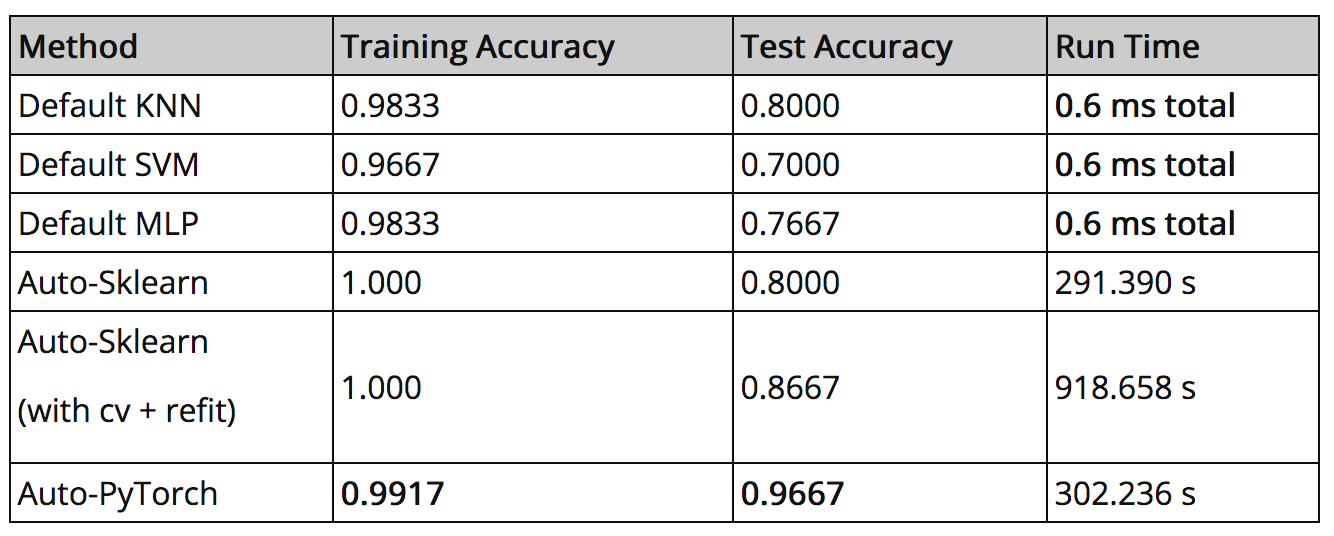

# Auto-PyTorch
<hr style="border:2px solid black"> </hr>


- Auto-PyTorch, like Auto-Sklearn, is built to be extremely simple to use. 



In [ ]:
model = ANC(max_runtime=300, min_budget=30, max_budget=90, cuda=False)

model.fit(train_x, train_y, validation_split=0.1)

In [ ]:
auto_predict = model.predict(test_x)
train_auto_predict = model.predict(train_x)

auto_accuracy = sklearn.metrics.accuracy_score(test_y, auto_predict)
train_auto_accuracy = sklearn.metrics.accuracy_score(train_y, train_auto_predict)

print(f"auto-pytorch test accuracy {auto_accuracy:.4}")
print(f"auto-pytorch train accuracy {train_auto_accuracy:.4}")

# References
<hr style="border:2px solid black"> </hr>


- https://www.kdnuggets.com/2021/10/automl-introduction-auto-sklearn-auto-pytorch.html
- https://automl.github.io/auto-sklearn/master/api.html

